In [124]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn import mixture
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [125]:
table1= pd.read_csv("table1.csv")
table1_filter= pd.read_csv("table1_filter.csv")
table2= pd.read_csv("table2_revised_2.csv")
table3= pd.read_csv("table3.csv")
table4= pd.read_csv("table4.csv")
table5= pd.read_csv("table5.csv")

In [126]:
table1.head()#need to get firteam id there

,Unnamed: 0,fireteamids2,matchID,mode,standing,team_id,teamscore
0,0,1.426077e+18,1459943405,43,0.0,16.0,91.0
1,1,-3.415977e+17,1459943405,43,1.0,17.0,70.0
2,2,5.189524e+18,1459943405,43,0.0,16.0,91.0
3,3,-3.415977e+17,1459943405,43,1.0,17.0,70.0
4,4,-1.641057e+18,1459943405,43,0.0,16.0,91.0


In [127]:
table1_filter.head()

,Unnamed: 0,fireteamids2,matchID,mode,standing,team_id,teamscore,fireid
0,0,-3.415977e+17,1459943405,43,1.0,17.0,70.0,-3.415977e+17
1,1,-3.415977e+17,1459943405,43,1.0,17.0,70.0,-3.415977e+17
2,2,-3.415977e+17,1459943405,43,1.0,17.0,70.0,-3.415977e+17
3,3,-3.415977e+17,1459943405,43,1.0,17.0,70.0,-3.415977e+17
4,4,8.422925e+17,986171745,10,1.0,16.0,87.0,8.422925e+17


In [128]:
table1.shape

(26600, 7)

In [129]:
table1_filter.shape

(13241, 8)

In [130]:
table2.head()#character_level: highest, Grenade,Melee,Super:avg, all features

,Unnamed: 0,Ability,Character_Class,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,matchID,playersID,score
0,0,0.0,Titan,25,1.0,1.833333,335,2.0,2.0,3.0,3.200000,9.0,2.000000,15.0,1459943405,2305843009283916134,32.0
1,1,0.0,Hunter,25,1.0,1.200000,334,0.0,0.0,2.0,1.687500,15.0,1.266667,17.0,1459943405,2305843009260473349,27.0
2,2,0.0,Warlock,25,1.0,0.653846,335,0.0,0.0,3.0,1.071429,13.0,0.769231,7.0,1459943405,2305843009265606964,15.0
3,3,0.0,Titan,25,0.0,0.406250,335,1.0,1.0,1.0,0.764706,16.0,0.437500,6.0,1459943405,2305843009264488479,13.0
4,4,0.0,Hunter,20,0.0,2.555556,290,1.0,1.0,12.0,3.400000,9.0,3.222222,17.0,986171745,2305843009301451364,34.0


In [131]:
len(table2.columns)

17

In [132]:
table2.shape

(10036, 17)

In [133]:
len(set(table2['playersID']))

6140

In [134]:
table3.head()

,fireTeamID,playerID
0,-3.685548e+17,2305843009268720704
1,-2.245961e+18,2305843009265606963
2,-5.620820e+18,2305843009262752454
3,1.855335e+17,2305843009261639164
4,3.666009e+18,2305843009265034294


In [135]:
table4.head()

,Unnamed: 0,reference_id,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,itemType,itemSubType,tierTypeName,equipmentSlotTypeHash,itemCategoryHashes,levels,loreHash_list
0,0,423789,Mythos Hack 4.1,Gauntlets,Rare Gauntlets,2,27,Rare,3.551919e+09,"[23, 46, 20]","[33, 32, 30, 29, 20, 19, 17, 15, 13, 11, 9, 7,...",NaN
1,1,4425887,The Time-Worn Spire,Pulse Rifle,Legendary Pulse Rifle,3,13,Legendary,1.498877e+09,"[2, 1, 7]","[33, 1]",NaN
2,2,7242309,Future War Cult Arsenal,Armor Set,Legendary Armor Set,0,0,Legendary,NaN,[2423200735],[20],NaN
3,3,7242310,Future War Cult Arsenal,Armor Set,Legendary Armor Set,0,0,Legendary,NaN,[2423200735],[20],NaN
4,4,10307688,Wildwood Plate,Chest Armor,Legendary Chest Armor,2,28,Legendary,1.423949e+07,"[22, 47, 20]","[33, 1, 0]",NaN


In [136]:
table5.head()

,Unnamed: 0,matchID,playersID,referenceID,uniqueWeaponKills,uniqueWeaponKillsPrecisionKills,uniqueWeaponPrecisionKills
0,0,1459943405,2305843009266126020,3393130645,9.0,0.444444,4.0
1,1,1459943405,2305843009266126020,3691881271,1.0,0.000000,0.0
2,2,1459943405,2305843009283916134,1650442173,3.0,0.333333,1.0
3,3,1459943405,2305843009283916134,3906942101,6.0,0.333333,2.0
4,4,1459943405,2305843009264211849,3762467078,9.0,0.333333,3.0


## Reformat tables 

In [137]:
#table1
table1=table1[["matchID","fireteamids2","mode","standing","team_id","teamscore"]]
table1.columns=[["matchID","fireTeamID","mode","standing","team_id","teamscore"]]
table1.head()

,matchID,fireTeamID,mode,standing,team_id,teamscore
0,1459943405,1.426077e+18,43,0.0,16.0,91.0
1,1459943405,-3.415977e+17,43,1.0,17.0,70.0
2,1459943405,5.189524e+18,43,0.0,16.0,91.0
3,1459943405,-3.415977e+17,43,1.0,17.0,70.0
4,1459943405,-1.641057e+18,43,0.0,16.0,91.0


In [138]:
#table2
table2=table2.drop('Unnamed: 0',axis=1)

In [139]:
table2.head()

,Ability,Character_Class,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,matchID,playersID,score
0,0.0,Titan,25,1.0,1.833333,335,2.0,2.0,3.0,3.200000,9.0,2.000000,15.0,1459943405,2305843009283916134,32.0
1,0.0,Hunter,25,1.0,1.200000,334,0.0,0.0,2.0,1.687500,15.0,1.266667,17.0,1459943405,2305843009260473349,27.0
2,0.0,Warlock,25,1.0,0.653846,335,0.0,0.0,3.0,1.071429,13.0,0.769231,7.0,1459943405,2305843009265606964,15.0
3,0.0,Titan,25,0.0,0.406250,335,1.0,1.0,1.0,0.764706,16.0,0.437500,6.0,1459943405,2305843009264488479,13.0
4,0.0,Hunter,20,0.0,2.555556,290,1.0,1.0,12.0,3.400000,9.0,3.222222,17.0,986171745,2305843009301451364,34.0


In [140]:
table2["KDA"].describe()

count    10036.000000
mean         1.789938
std          2.351752
min          0.000000
25%          0.571429
50%          1.055556
75%          2.000000
max         30.500000
Name: KDA, dtype: float64

In [141]:
#table3
#good
table3.head()

,fireTeamID,playerID
0,-3.685548e+17,2305843009268720704
1,-2.245961e+18,2305843009265606963
2,-5.620820e+18,2305843009262752454
3,1.855335e+17,2305843009261639164
4,3.666009e+18,2305843009265034294


In [142]:
#table4
table4=table4[["reference_id","weapon_name",'itemTypeDisplayName',"itemTypeAndTierDisplayName","tierTypeName"]]
table4.head()

,reference_id,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,tierTypeName
0,423789,Mythos Hack 4.1,Gauntlets,Rare Gauntlets,Rare
1,4425887,The Time-Worn Spire,Pulse Rifle,Legendary Pulse Rifle,Legendary
2,7242309,Future War Cult Arsenal,Armor Set,Legendary Armor Set,Legendary
3,7242310,Future War Cult Arsenal,Armor Set,Legendary Armor Set,Legendary
4,10307688,Wildwood Plate,Chest Armor,Legendary Chest Armor,Legendary


In [143]:
#table 5
table5.columns

Index(['Unnamed: 0', 'matchID', 'playersID', 'referenceID',
       'uniqueWeaponKills', 'uniqueWeaponKillsPrecisionKills',
       'uniqueWeaponPrecisionKills'],
      dtype='object')

In [144]:
table5=table5[['matchID','playersID', 'referenceID', 'uniqueWeaponKills',
       'uniqueWeaponKillsPrecisionKills', 'uniqueWeaponPrecisionKills']]
table5.head()

,matchID,playersID,referenceID,uniqueWeaponKills,uniqueWeaponKillsPrecisionKills,uniqueWeaponPrecisionKills
0,1459943405,2305843009266126020,3393130645,9.0,0.444444,4.0
1,1459943405,2305843009266126020,3691881271,1.0,0.000000,0.0
2,1459943405,2305843009283916134,1650442173,3.0,0.333333,1.0
3,1459943405,2305843009283916134,3906942101,6.0,0.333333,2.0
4,1459943405,2305843009264211849,3762467078,9.0,0.333333,3.0


In [145]:
table5[table5["playersID"]==2305843009260294098]

,matchID,playersID,referenceID,uniqueWeaponKills,uniqueWeaponKillsPrecisionKills,uniqueWeaponPrecisionKills
6375,321966782,2305843009260294098,1331482397,2.0,0.500000,1.0
6376,321966782,2305843009260294098,3762467076,3.0,0.333333,1.0


### Aggregate the table5 by playersID +ReferenceID 

In [146]:
agg_table5=table5.groupby(['playersID','referenceID']).agg({'uniqueWeaponKills':"mean","uniqueWeaponKillsPrecisionKills":"mean","uniqueWeaponPrecisionKills":"mean"}).reset_index().rename(columns={'uniqueWeaponKills': 'avg_uniqueWeaponKills', 'uniqueWeaponKillsPrecisionKills': 'avg_uniqueWeaponKillsPrecisionKills',"uniqueWeaponPrecisionKills":"avg_uniqueWeaponPrecisionKills"})

In [147]:
agg_table5.head()

,playersID,referenceID,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills
0,2305843009260294098,1331482397,2.0,0.500000,1.0
1,2305843009260294098,3762467076,3.0,0.333333,1.0
2,2305843009260296167,1180270692,1.0,0.000000,0.0
3,2305843009260296167,1331482397,2.0,0.500000,1.0
4,2305843009260296167,3762467076,3.0,1.000000,3.0


In [148]:

agg_table2[agg_table2["playersID"]==2305843009266126020]

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,Character_Class


In [149]:
agg_table2=table2.groupby("playersID").agg({'Ability':"mean","Character_Level":"mean",'Grenade':"mean","KDA":"mean",'Lightlevel':"mean","Melee":"mean",'Super':"mean","assists":"mean",'avg_score_per_life':"mean","deaths":"mean",'efficiency':"mean","kills":"mean","score":"mean"}).reset_index()



In [150]:
agg_table2.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,10.0,0.900000,7.0,0.0
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0
2,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0
3,2305843009260300369,0.0,25.0,0.0,7.000000,332.0,0.0,2.0,6.0,1.333333,2.0,8.500000,11.0,4.0
4,2305843009260303777,0.0,20.0,0.0,1.516667,302.5,0.0,1.0,3.0,0.931818,6.5,1.783333,5.5,5.0


In [152]:
agg_table2_1=pd.merge(agg_table2,table2[["playersID","Character_Class"]],how="left", on='playersID')
agg_table2_1.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,Character_Class
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,10.0,0.900000,7.0,0.0,Hunter
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0,Titan
2,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0,Warlock
3,2305843009260300369,0.0,25.0,0.0,7.000000,332.0,0.0,2.0,6.0,1.333333,2.0,8.500000,11.0,4.0,Warlock
4,2305843009260303777,0.0,20.0,0.0,1.516667,302.5,0.0,1.0,3.0,0.931818,6.5,1.783333,5.5,5.0,Hunter


In [153]:
agg_table2=agg_table2_1

### Merge Table2 and 5, primary key = playerID + referenceID 

In [154]:
table2_5=pd.merge(agg_table2,agg_table5,how="inner",left_on="playersID",right_on="playersID")
table2_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,Character_Class,referenceID,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,10.0,0.900000,7.0,0.0,Hunter,3762467076,6.0,0.500000,3.0
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0,Titan,1960218487,2.0,0.500000,1.0
2,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0,Titan,3393130645,3.0,0.000000,0.0
3,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0,Warlock,925326393,3.0,0.333333,1.0
4,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0,Warlock,2414612777,7.0,0.285714,2.0


In [155]:
agg_table2[agg_table2['playersID']==2305843009283916134]

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,Character_Class
7858,2305843009283916134,0.0,25.0,1.0,1.833333,335.0,2.0,2.0,3.0,3.2,9.0,2.0,15.0,32.0,Titan


### Merge Table2_5 with table 4, primary key = playerID + referenceID

In [156]:
table2_4_5=pd.merge(table2_5,table4,how="left",left_on="referenceID",right_on="reference_id")
table2_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Character_Class,referenceID,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,reference_id,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,tierTypeName
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,...,Hunter,3762467076,6.0,0.500000,3.0,3762467076,Uriel's Gift,Auto Rifle,Legendary Auto Rifle,Legendary
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,...,Titan,1960218487,2.0,0.500000,1.0,1960218487,Nameless Midnight,Scout Rifle,Legendary Scout Rifle,Legendary
2,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,...,Titan,3393130645,3.0,0.000000,0.0,3393130645,Positive Outlook,Auto Rifle,Legendary Auto Rifle,Legendary
3,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,...,Warlock,925326393,3.0,0.333333,1.0,925326393,Manannan SR4,Scout Rifle,Legendary Scout Rifle,Legendary
4,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,...,Warlock,2414612777,7.0,0.285714,2.0,2414612777,Atalanta-D,Submachine Gun,Legendary Submachine Gun,Legendary


### Merge Table2_4_5 with table 3 

In [157]:
table2_3_4_5=pd.merge(table2_4_5,table3,how="inner",left_on="playersID",right_on="playerID")
table2_3_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,reference_id,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,tierTypeName,fireTeamID,playerID
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,...,6.0,0.500000,3.0,3762467076,Uriel's Gift,Auto Rifle,Legendary Auto Rifle,Legendary,7.895231e+18,2305843009260297704
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,...,2.0,0.500000,1.0,1960218487,Nameless Midnight,Scout Rifle,Legendary Scout Rifle,Legendary,-6.049278e+18,2305843009260298385
2,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,...,3.0,0.000000,0.0,3393130645,Positive Outlook,Auto Rifle,Legendary Auto Rifle,Legendary,-6.049278e+18,2305843009260298385
3,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,...,3.0,0.333333,1.0,925326393,Manannan SR4,Scout Rifle,Legendary Scout Rifle,Legendary,-8.318944e+18,2305843009260299207
4,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,...,7.0,0.285714,2.0,2414612777,Atalanta-D,Submachine Gun,Legendary Submachine Gun,Legendary,-8.318944e+18,2305843009260299207


In [158]:
table2_3_4_5.columns

Index(['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score', 'Character_Class',
       'referenceID', 'avg_uniqueWeaponKills',
       'avg_uniqueWeaponKillsPrecisionKills', 'avg_uniqueWeaponPrecisionKills',
       'reference_id', 'weapon_name', 'itemTypeDisplayName',
       'itemTypeAndTierDisplayName', 'tierTypeName', 'fireTeamID', 'playerID'],
      dtype='object')

In [159]:
table2_3_4_5=table2_3_4_5.drop(["reference_id","playerID"],axis=1)

In [160]:
table2_3_4_5.columns

Index(['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score', 'Character_Class',
       'referenceID', 'avg_uniqueWeaponKills',
       'avg_uniqueWeaponKillsPrecisionKills', 'avg_uniqueWeaponPrecisionKills',
       'weapon_name', 'itemTypeDisplayName', 'itemTypeAndTierDisplayName',
       'tierTypeName', 'fireTeamID'],
      dtype='object')

In [161]:
table2_3_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Character_Class,referenceID,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,tierTypeName,fireTeamID
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,...,Hunter,3762467076,6.0,0.500000,3.0,Uriel's Gift,Auto Rifle,Legendary Auto Rifle,Legendary,7.895231e+18
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,...,Titan,1960218487,2.0,0.500000,1.0,Nameless Midnight,Scout Rifle,Legendary Scout Rifle,Legendary,-6.049278e+18
2,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,...,Titan,3393130645,3.0,0.000000,0.0,Positive Outlook,Auto Rifle,Legendary Auto Rifle,Legendary,-6.049278e+18
3,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,...,Warlock,925326393,3.0,0.333333,1.0,Manannan SR4,Scout Rifle,Legendary Scout Rifle,Legendary,-8.318944e+18
4,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,...,Warlock,2414612777,7.0,0.285714,2.0,Atalanta-D,Submachine Gun,Legendary Submachine Gun,Legendary,-8.318944e+18


### Trying to do clustering using table2_agg

In [162]:
table2_3_4_5["itemTypeDisplayName"].head()

0        Auto Rifle
1       Scout Rifle
2        Auto Rifle
3       Scout Rifle
4    Submachine Gun
Name: itemTypeDisplayName, dtype: object

In [163]:
table_cluster=agg_table2.drop(["Character_Class","playersID"],axis=1)
table_cluster.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,10.0,0.900000,7.0,0.0
1,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0
2,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0
3,0.0,25.0,0.0,7.000000,332.0,0.0,2.0,6.0,1.333333,2.0,8.500000,11.0,4.0
4,0.0,20.0,0.0,1.516667,302.5,0.0,1.0,3.0,0.931818,6.5,1.783333,5.5,5.0


In [164]:
table_cluster.describe()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
count,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,9713.000000,10036.000000,10036.000000,10036.000000,10036.000000
mean,0.005181,22.520327,0.325628,1.789938,307.768035,0.453268,0.616680,3.175169,0.848068,7.683639,2.125430,7.266640,6.950976
std,0.059991,2.764213,0.501390,1.749751,38.425817,0.692138,1.208225,2.099623,0.810180,3.622393,2.089519,4.240799,8.533908
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.681818,301.000000,0.000000,0.000000,1.888889,0.222222,5.000000,0.818182,4.000000,2.000000
50%,0.000000,25.000000,0.000000,1.250000,307.000000,0.142857,0.000000,3.000000,0.666667,7.000000,1.461538,7.000000,4.000000
75%,0.000000,25.000000,0.500000,2.333333,331.666667,0.750000,1.000000,4.333333,1.235975,10.000000,2.769162,9.866667,6.000000
max,2.000000,25.000000,5.000000,25.000000,335.000000,8.000000,16.000000,16.000000,9.333333,25.000000,28.000000,28.000000,63.000000


### Normalization 

In [165]:
def my_scaler(x):
    """standardize the predictors"""
    
    new_x = pd.DataFrame(scale(x, axis=0, with_mean=True, with_std=True, copy=True))
    new_x.columns = x.columns
    
    return new_x

In [166]:
table_cluster.isnull().any() #contain na?

Ability               False
Character_Level       False
Grenade               False
KDA                   False
Lightlevel            False
Melee                 False
Super                 False
assists               False
avg_score_per_life     True
deaths                False
efficiency            False
kills                 False
score                 False
dtype: bool

In [167]:
table_cluster[table_cluster.isnull().any(axis=1)].head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
98,0.0,25.0,0.0,1.523653,332.166667,0.166667,0.833333,3.666667,NaN,9.833333,1.735017,11.166667,21.5
99,0.0,25.0,0.0,1.523653,332.166667,0.166667,0.833333,3.666667,NaN,9.833333,1.735017,11.166667,21.5
100,0.0,25.0,0.0,1.523653,332.166667,0.166667,0.833333,3.666667,NaN,9.833333,1.735017,11.166667,21.5
101,0.0,25.0,0.0,1.523653,332.166667,0.166667,0.833333,3.666667,NaN,9.833333,1.735017,11.166667,21.5
102,0.0,25.0,0.0,1.523653,332.166667,0.166667,0.833333,3.666667,NaN,9.833333,1.735017,11.166667,21.5


In [168]:
table_cluster_clean=table_cluster[pd.notnull(table_cluster["avg_score_per_life"])] #remove missing value
table_cluster_clean.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,10.0,0.900000,7.0,0.0
1,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0
2,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0
3,0.0,25.0,0.0,7.000000,332.0,0.0,2.0,6.0,1.333333,2.0,8.500000,11.0,4.0
4,0.0,20.0,0.0,1.516667,302.5,0.0,1.0,3.0,0.931818,6.5,1.783333,5.5,5.0


In [169]:
table_cluster_clean.isnull().any() #contain na?

Ability               False
Character_Level       False
Grenade               False
KDA                   False
Lightlevel            False
Melee                 False
Super                 False
assists               False
avg_score_per_life    False
deaths                False
efficiency            False
kills                 False
score                 False
dtype: bool

In [170]:
#normalization
player_feature_df = my_scaler(table_cluster_clean)
player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,-0.087808,0.918247,-0.646912,-0.562657,0.724337,-0.654389,-0.659644,-0.556741,-1.046820,0.668621,-0.583846,-0.029499,-0.863853
1,-0.087808,0.918247,1.362508,-0.645613,0.724337,-0.654389,-0.659644,0.888633,0.452043,1.501190,-0.609407,-0.270883,1.513524
2,-0.087808,0.918247,7.390767,0.604958,0.512080,0.782988,0.683006,1.370424,5.279264,-0.163948,0.548655,2.384343,4.869821
3,-0.087808,0.918247,-0.646912,2.956405,0.644740,-0.654389,2.025656,1.370424,0.598991,-1.551563,3.023883,0.936038,-0.304470
4,-0.087808,-0.886986,-0.646912,-0.155884,-0.137959,-0.654389,0.683006,-0.074950,0.103377,-0.302710,-0.164526,-0.391575,-0.164624


In [64]:
# Fit a GMM model
clf = mixture.GaussianMixture(n_components=8, covariance_type='full')
clf.fit(player_feature_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=8, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [65]:
# Get the predicted group
pd.Series(clf.predict(player_feature_df)).value_counts()

2    2446
5    2423
3    2056
0    1616
4     818
6     196
7      96
1      62
dtype: int64

##### Estimate The Number of Gaussians
To estimate the number of Gaussians, we use AIC and BIC as our critirion, which are defined as following:

$$AIC = 2p -2 ln(L)$$
$$BIC = p ln(N) -2 ln(L)$$

* **p**: the number of estimated parameters in the model 
* **L**: the maximum value of the likelihood function for the model
* **N**: the total number of data points

We want to choose the number of clusters that makes AIC and BIC the smallest.

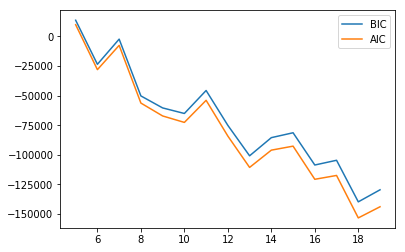

In [66]:
n_components = np.arange(5, 20)
clfs = [mixture.GaussianMixture(n_components=n, covariance_type='full').fit(player_feature_df) for n in n_components]
bics = [clf_temp.bic(player_feature_df) for clf_temp in clfs]
aics = [clf_temp.aic(player_feature_df) for clf_temp in clfs]

plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.legend();

### Model Result 

In [254]:
player_feature_df = player_feature_df.copy()

In [255]:
player_feature_df['cluster'] = clf.predict(player_feature_df)

In [256]:
player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,cluster
0,-0.087808,0.918247,-0.646912,-0.562657,0.724337,-0.654389,-0.659644,-0.556741,-1.046820,0.668621,-0.583846,-0.029499,-0.863853,2
1,-0.087808,0.918247,1.362508,-0.645613,0.724337,-0.654389,-0.659644,0.888633,0.452043,1.501190,-0.609407,-0.270883,1.513524,4
2,-0.087808,0.918247,7.390767,0.604958,0.512080,0.782988,0.683006,1.370424,5.279264,-0.163948,0.548655,2.384343,4.869821,6
3,-0.087808,0.918247,-0.646912,2.956405,0.644740,-0.654389,2.025656,1.370424,0.598991,-1.551563,3.023883,0.936038,-0.304470,3
4,-0.087808,-0.886986,-0.646912,-0.155884,-0.137959,-0.654389,0.683006,-0.074950,0.103377,-0.302710,-0.164526,-0.391575,-0.164624,7


### Result Visualization 1 

In [233]:
def plot_cluster_result(df, cluster_colname):
    """ploting all cluster in a single guitar tab plot"""    
    
    sns.set(style="whitegrid")

    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Initialize the figure
    f, ax = plt.subplots()
    sns.despine(bottom=True, left=True)

#     # Show each observation with a scatterplot
#     sns.stripplot(x="value", y="measurement", hue=cluster_colname,
#                   data=df, dodge=True, jitter=True,
#                   alpha=.25, zorder=1)
    
    # Show the conditional means
    sns.pointplot(x="value", y="measurement", hue=cluster_colname,
                  data=df, dodge=.532, join=True, palette="dark",
                  markers="d", scale=.75, ci=None)

    # Improve the legend 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[0:], labels[0:], title=cluster_colname,
              handletextpad=0, columnspacing=1,
              loc="lower right", ncol=3, frameon=True)

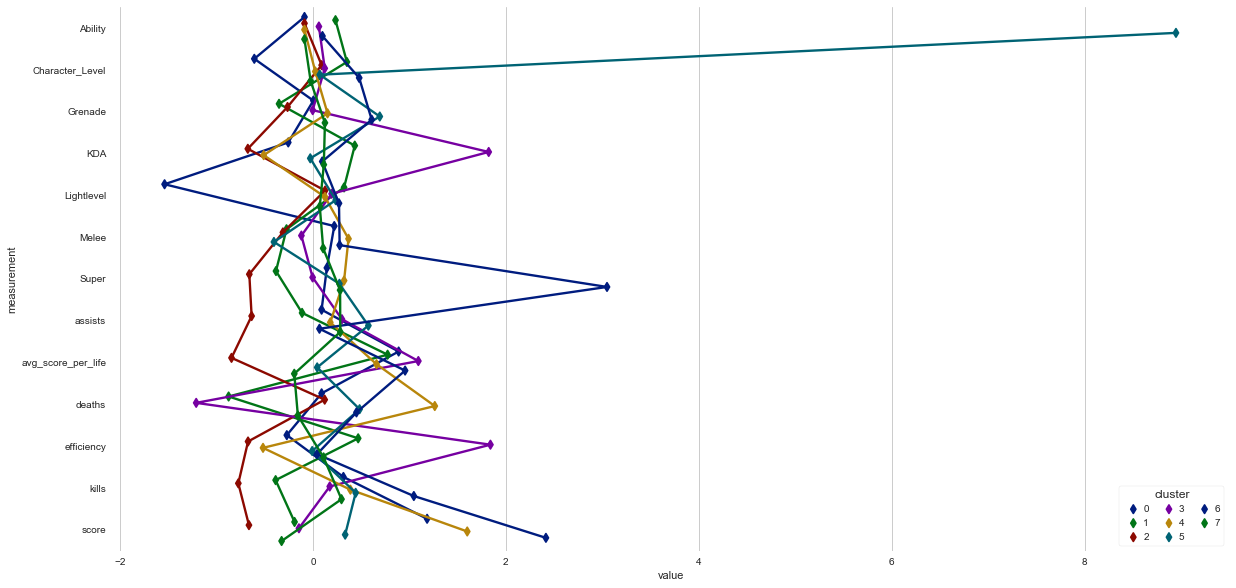

In [260]:
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(player_feature_df, 'cluster')

### Result Visualization 2

In [234]:
def plot_single_cluster(df, cluster_colname, cluster_num, color="#3160D6"):
    """plot guitar tab plot for a single cluster"""
    
    sns.set(style="whitegrid")

    # filter cluster data
    df = df[df[cluster_colname]==cluster_num].copy()
        
    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Initialize the figure
    f, ax = plt.subplots()
    sns.despine(bottom=True, left=True)

    # Show the conditional means
    sns.pointplot(x="value", y="measurement", 
                  data=df, dodge=.532, join=False, 
                  markers="d", scale=.75, ci=None, color=color)#palette="dark",

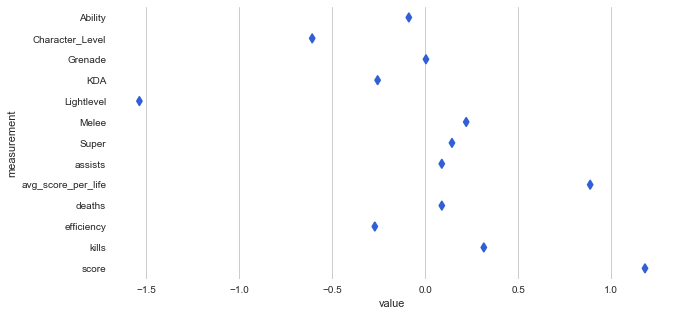

In [266]:
plt.rcParams["figure.figsize"] = (10,5)
plot_single_cluster(player_feature_df, 'cluster', 0)

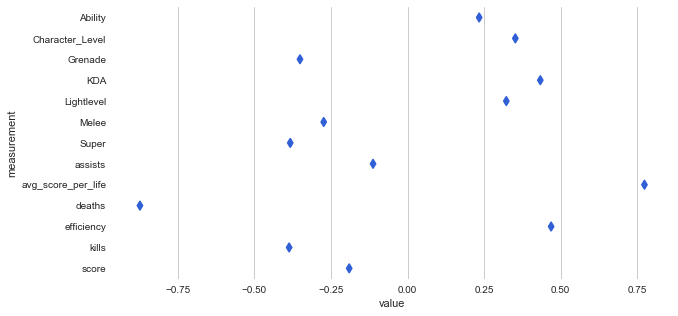

In [267]:
plot_single_cluster(player_feature_df, 'cluster', 1)

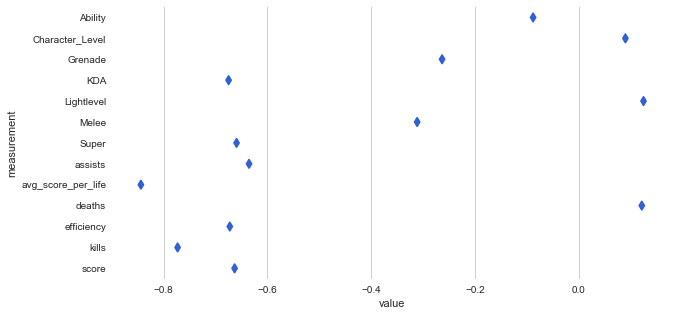

In [268]:
plot_single_cluster(player_feature_df, 'cluster', 2)

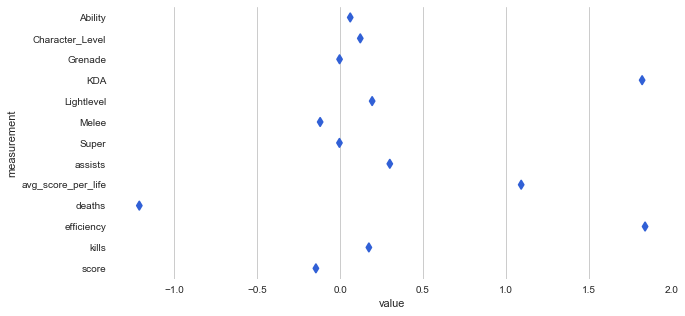

In [269]:
plot_single_cluster(player_feature_df, 'cluster', 3)

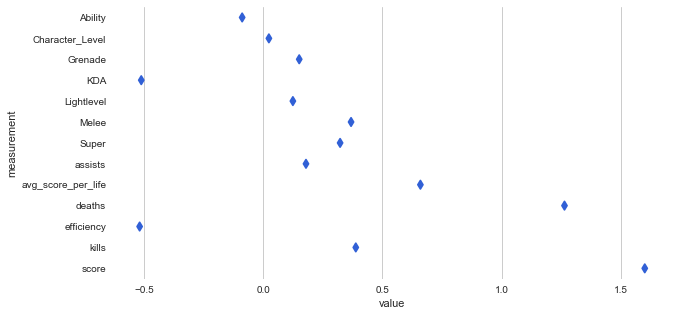

In [270]:
plot_single_cluster(player_feature_df, 'cluster', 4)

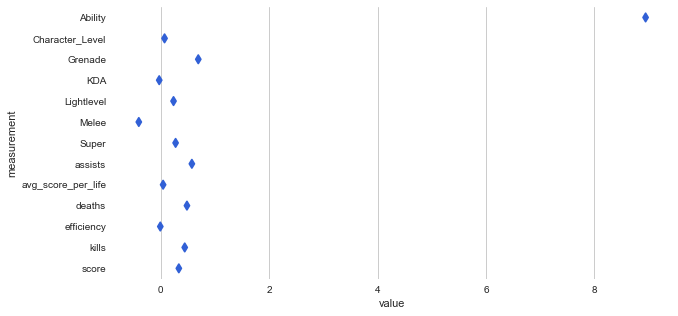

In [271]:
plot_single_cluster(player_feature_df, 'cluster', 5)

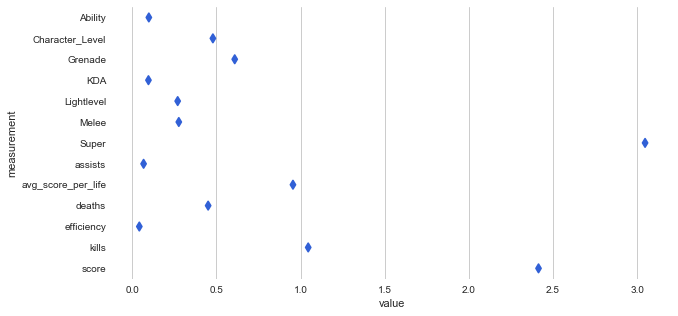

In [272]:
plot_single_cluster(player_feature_df, 'cluster', 6)

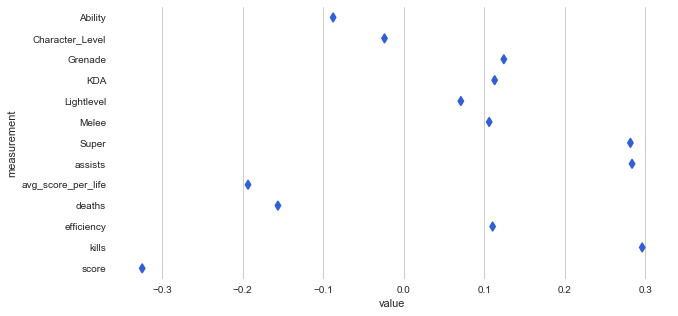

In [273]:
plot_single_cluster(player_feature_df, 'cluster', 7)

### Result Visualization 3 

In [235]:
def plot_cluster_facet(df, cluster_colname):
    """plot guitar tab plot for a single cluster"""
    
    sns.set(style="whitegrid")
        
    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Show the conditional means
    g = sns.factorplot(x="value", y="measurement",
                   col="cluster",
                    data=df, kind="point",
                    dodge=False,
                    size=4, aspect=.7);#hue="smoker", 

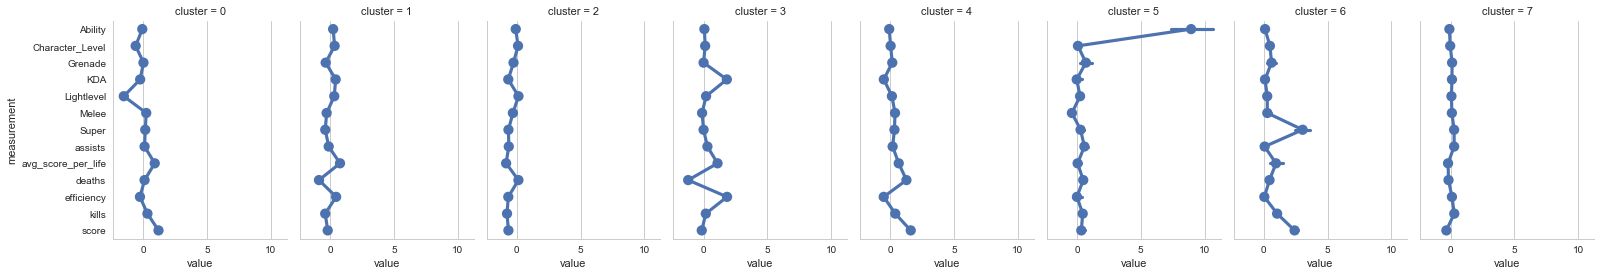

In [275]:
plot_cluster_facet(player_feature_df, 'cluster')

### Consider to use table2_4_5 to cluster 

In [171]:
#aggregate player's performance by weapon class
table2_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Character_Class,referenceID,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,reference_id,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,tierTypeName
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,...,Hunter,3762467076,6.0,0.500000,3.0,3762467076,Uriel's Gift,Auto Rifle,Legendary Auto Rifle,Legendary
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,...,Titan,1960218487,2.0,0.500000,1.0,1960218487,Nameless Midnight,Scout Rifle,Legendary Scout Rifle,Legendary
2,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,...,Titan,3393130645,3.0,0.000000,0.0,3393130645,Positive Outlook,Auto Rifle,Legendary Auto Rifle,Legendary
3,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,...,Warlock,925326393,3.0,0.333333,1.0,925326393,Manannan SR4,Scout Rifle,Legendary Scout Rifle,Legendary
4,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,...,Warlock,2414612777,7.0,0.285714,2.0,2414612777,Atalanta-D,Submachine Gun,Legendary Submachine Gun,Legendary


In [172]:
table2_4_5=table2_4_5.drop(["Character_Class","referenceID","reference_id","weapon_name","itemTypeAndTierDisplayName","tierTypeName"],axis=1)

In [173]:
table2_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,itemTypeDisplayName
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,10.0,0.900000,7.0,0.0,6.0,0.500000,3.0,Auto Rifle
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0,2.0,0.500000,1.0,Scout Rifle
2,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0,3.0,0.000000,0.0,Auto Rifle
3,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0,3.0,0.333333,1.0,Scout Rifle
4,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0,7.0,0.285714,2.0,Submachine Gun


In [174]:
table2_4_5.columns

Index(['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score', 'avg_uniqueWeaponKills',
       'avg_uniqueWeaponKillsPrecisionKills', 'avg_uniqueWeaponPrecisionKills',
       'itemTypeDisplayName'],
      dtype='object')

### groupby itemTypeDisplayName+playersID

In [175]:
table_player_weaponclass=table2_4_5.groupby(['playersID','itemTypeDisplayName']).agg({'avg_uniqueWeaponKills':"mean","avg_uniqueWeaponKillsPrecisionKills":"mean","avg_uniqueWeaponPrecisionKills":"mean"}).reset_index()

In [176]:
table_player_weaponclass.head()

,playersID,itemTypeDisplayName,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills
0,2305843009260297704,Auto Rifle,6.0,0.500000,3.0
1,2305843009260298385,Auto Rifle,3.0,0.000000,0.0
2,2305843009260298385,Scout Rifle,2.0,0.500000,1.0
3,2305843009260299207,Grenade Launcher,1.0,0.000000,0.0
4,2305843009260299207,Scout Rifle,3.0,0.333333,1.0


In [177]:
#consider use only avg_uniqueWeaponKills as weapon performance matric
table_player_weaponclass=table_player_weaponclass.drop(["avg_uniqueWeaponKillsPrecisionKills","avg_uniqueWeaponPrecisionKills"],axis=1)

In [178]:
table_player_weaponclass.head()

,playersID,itemTypeDisplayName,avg_uniqueWeaponKills
0,2305843009260297704,Auto Rifle,6.0
1,2305843009260298385,Auto Rifle,3.0
2,2305843009260298385,Scout Rifle,2.0
3,2305843009260299207,Grenade Launcher,1.0
4,2305843009260299207,Scout Rifle,3.0


In [179]:
len(table_player_weaponclass)

12898

In [180]:
table_player_weaponclass_pivot=table_player_weaponclass.pivot(columns='itemTypeDisplayName', values='avg_uniqueWeaponKills')

In [181]:
len(table_player_weaponclass_pivot)

12898

In [182]:
table_player_weaponclass_pivot["playersID"]=table_player_weaponclass["playersID"]
table_player_weaponclass_pivot.head()

itemTypeDisplayName,Auto Rifle,Fusion Rifle,Grenade Launcher,Hand Cannon,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle,playersID
0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2305843009260297704
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2305843009260298385
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2305843009260298385
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2305843009260299207
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2305843009260299207


In [189]:
table_player_weaponclass_pivot=table_player_weaponclass_pivot.fillna(0)
#table_player_weaponclass_pivot=table_player_weaponclass_pivot.drop('itemTypeDisplayName')
table_player_weaponclass_pivot.head()

itemTypeDisplayName,Auto Rifle,Fusion Rifle,Grenade Launcher,Hand Cannon,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle,playersID
0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2305843009260297704
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2305843009260298385
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2305843009260298385
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2305843009260299207
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2305843009260299207


In [195]:
table_player_weaponclass_pivot.columns

Index(['Auto Rifle', 'Fusion Rifle', 'Grenade Launcher', 'Hand Cannon',
       'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher', 'Scout Rifle',
       'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun', 'Sword',
       'Trace Rifle', 'playersID'],
      dtype='object', name='itemTypeDisplayName')

### Aggregate weapon class table by players 

In [198]:
unique_table_player_weaponclass_pivot=table_player_weaponclass_pivot.groupby("playersID").agg({'Auto Rifle': "sum", 'Fusion Rifle': "sum", 'Grenade Launcher': "sum", 'Hand Cannon': "sum",
       'Linear Fusion Rifle': "sum", 'Pulse Rifle': "sum", 'Rocket Launcher': "sum", 'Scout Rifle': "sum",
       'Shotgun': "sum", 'Sidearm': "sum", 'Sniper Rifle': "sum", 'Submachine Gun': "sum", 'Sword': "sum",
       'Trace Rifle': "sum"}).reset_index()

In [201]:
unique_table_player_weaponclass_pivot.head()

,playersID,Auto Rifle,Fusion Rifle,Grenade Launcher,Hand Cannon,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,2305843009260297704,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2305843009260298385,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2305843009260299207,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0
3,2305843009260300369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0
4,2305843009260303777,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [78]:
#merge the pivot table back to table2_4_5
table2_4_5.columns

Index(['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score', 'avg_uniqueWeaponKills',
       'avg_uniqueWeaponKillsPrecisionKills', 'avg_uniqueWeaponPrecisionKills',
       'itemTypeDisplayName'],
      dtype='object')

### Aggregate  table2_4_5 in to unique player level

In [205]:
table2_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,itemTypeDisplayName
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,10.0,0.900000,7.0,0.0,6.0,0.500000,3.0,Auto Rifle
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0,2.0,0.500000,1.0,Scout Rifle
2,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0,3.0,0.000000,0.0,Auto Rifle
3,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0,3.0,0.333333,1.0,Scout Rifle
4,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0,7.0,0.285714,2.0,Submachine Gun


In [207]:
table2_4_5_clean=table2_4_5[['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score']]

In [208]:
table2_4_5_clean.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,10.0,0.900000,7.0,0.0
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0
2,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0
3,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0
4,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0


In [210]:
unique_table2_4_5_clean=table2_4_5_clean.groupby("playersID").agg({'Ability':"mean", 'Character_Level':"mean", 'Grenade':"mean", 'KDA':"mean",
       'Lightlevel':"mean", 'Melee':"mean", 'Super':"mean", 'assists':"mean", 'avg_score_per_life':"mean",
       'deaths':"mean", 'efficiency':"mean", 'kills':"mean", 'score':"mean"}).reset_index()

In [211]:
unique_table2_4_5_clean.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,10.0,0.900000,7.0,0.0
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,0.846154,6.0,17.0
2,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,3.285714,17.0,41.0
3,2305843009260300369,0.0,25.0,0.0,7.000000,332.0,0.0,2.0,6.0,1.333333,2.0,8.500000,11.0,4.0
4,2305843009260303777,0.0,20.0,0.0,1.516667,302.5,0.0,1.0,3.0,0.931818,6.5,1.783333,5.5,5.0


In [212]:
final_cluster=pd.merge(unique_table2_4_5_clean,unique_table_player_weaponclass_pivot, how= "inner", on="playersID")
final_cluster.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0
3,2305843009260300369,0.0,25.0,0.0,7.000000,332.0,0.0,2.0,6.0,1.333333,...,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0
4,2305843009260303777,0.0,20.0,0.0,1.516667,302.5,0.0,1.0,3.0,0.931818,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [213]:
final_cluster_clean=final_cluster[pd.notnull(final_cluster["avg_score_per_life"])] #remove missing value
final_cluster_clean.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0
3,2305843009260300369,0.0,25.0,0.0,7.000000,332.0,0.0,2.0,6.0,1.333333,...,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0
4,2305843009260303777,0.0,20.0,0.0,1.516667,302.5,0.0,1.0,3.0,0.931818,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [214]:
final_cluster_clean.isnull().any() #contain na?

playersID              False
Ability                False
Character_Level        False
Grenade                False
KDA                    False
Lightlevel             False
Melee                  False
Super                  False
assists                False
avg_score_per_life     False
deaths                 False
efficiency             False
kills                  False
score                  False
Auto Rifle             False
Fusion Rifle           False
Grenade Launcher       False
Hand Cannon            False
Linear Fusion Rifle    False
Pulse Rifle            False
Rocket Launcher        False
Scout Rifle            False
Shotgun                False
Sidearm                False
Sniper Rifle           False
Submachine Gun         False
Sword                  False
Trace Rifle            False
dtype: bool

In [215]:
final_cluster_clean.columns

Index(['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score', 'Auto Rifle', 'Fusion Rifle',
       'Grenade Launcher', 'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle',
       'Rocket Launcher', 'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle',
       'Submachine Gun', 'Sword', 'Trace Rifle'],
      dtype='object')

In [216]:
final_cluster_clean.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,2305843009260297704,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2305843009260298385,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2305843009260299207,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0
3,2305843009260300369,0.0,25.0,0.0,7.000000,332.0,0.0,2.0,6.0,1.333333,...,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0
4,2305843009260303777,0.0,20.0,0.0,1.516667,302.5,0.0,1.0,3.0,0.931818,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [217]:
len(final_cluster_clean['playersID'].unique())

5551

In [218]:
final_cluster_clean.to_csv("final_cluster_clean_2.csv")

### Cluster the dataset with weapon class 

In [219]:
final_cluster_clean=pd.read_csv("final_cluster_clean_2.csv")

In [220]:
player_feature_df=final_cluster_clean.drop("playersID",axis=1)
player_feature_df=player_feature_df.drop("Unnamed: 0",axis=1)

In [221]:
player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,0.0,25.0,0.0,0.800000,335.0,0.0,0.0,2.0,0.000000,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,25.0,1.0,0.653846,335.0,0.0,0.0,5.0,1.214286,13.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,25.0,4.0,2.857143,327.0,1.0,1.0,6.0,5.125000,7.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0
3,0.0,25.0,0.0,7.000000,332.0,0.0,2.0,6.0,1.333333,2.0,...,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0
4,0.0,20.0,0.0,1.516667,302.5,0.0,1.0,3.0,0.931818,6.5,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [222]:
player_feature_df.describe()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
count,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,...,5551.000000,5551.000000,5551.00000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000,5551.000000
mean,0.005526,22.382915,0.318778,1.511344,307.402028,0.464047,0.478563,3.113425,0.792626,8.325255,...,0.002522,0.272419,0.32821,1.235017,0.227225,0.552381,0.045548,0.890292,0.103150,0.219302
std,0.071851,2.705322,0.579422,1.772007,38.985428,0.787233,0.796517,2.325311,0.885614,3.821262,...,0.073478,1.077251,1.63353,2.627068,0.861284,1.493947,0.331868,1.872338,0.745651,1.123596
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.583333,300.812500,0.000000,0.000000,1.000000,0.125000,6.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,20.000000,0.000000,1.000000,305.000000,0.000000,0.000000,3.000000,0.500000,8.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,25.000000,0.500000,1.708333,331.000000,1.000000,1.000000,4.200000,1.200000,11.000000,...,0.000000,0.000000,0.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.000000,25.000000,5.000000,25.000000,335.000000,8.000000,7.125000,16.000000,9.333333,25.000000,...,4.000000,23.000000,74.00000,103.625000,16.000000,13.000000,7.000000,36.000000,35.000000,16.000000


In [223]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()

In [224]:
player_feature_df = my_scaler(player_feature_df)

In [225]:
player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,-0.076922,0.967471,-0.550215,-0.401470,0.707969,-0.589520,-0.600873,-0.478872,-0.895082,0.438310,...,-0.034327,-0.252906,-0.200939,-0.470155,-0.263845,-0.369779,-0.137258,-0.475540,-0.138347,-0.195197
1,-0.076922,0.967471,1.175799,-0.483957,0.707969,-0.589520,-0.600873,0.811395,0.476165,1.223461,...,-0.034327,-0.252906,-0.200939,0.291219,-0.263845,-0.369779,-0.137258,-0.475540,-0.138347,-0.195197
2,-0.076922,0.967471,6.353843,0.759546,0.502745,0.680867,0.654706,1.241483,4.892387,-0.346842,...,-0.034327,-0.252906,-0.200939,0.671906,-0.263845,-0.369779,-0.137258,3.263437,-0.138347,-0.195197
3,-0.076922,0.967471,-0.550215,3.097703,0.631010,-0.589520,1.910285,1.241483,0.610601,-1.655428,...,-0.034327,-0.252906,-0.200939,1.052592,-0.263845,2.977362,-0.137258,-0.475540,-0.138347,-0.195197
4,-0.076922,-0.880904,-0.550215,0.003004,-0.125751,-0.589520,0.654706,-0.048783,0.157185,-0.477701,...,-0.034327,-0.252906,-0.200939,-0.089468,0.897317,-0.369779,-0.137258,-0.475540,-0.138347,-0.195197


In [226]:
# Fit a GMM model
clf = mixture.GaussianMixture(n_components=6, covariance_type='full')
clf.fit(player_feature_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [227]:
# Get the predicted group
pd.Series(clf.predict(player_feature_df)).value_counts()

5    2020
1    1832
3    1104
0     384
2     137
4      74
dtype: int64

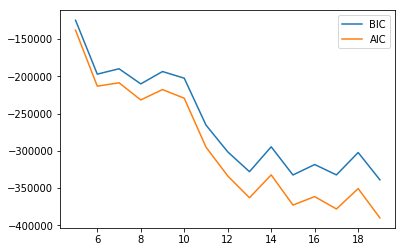

In [228]:
n_components = np.arange(5, 20)
clfs = [mixture.GaussianMixture(n_components=n, covariance_type='full').fit(player_feature_df) for n in n_components]
bics = [clf_temp.bic(player_feature_df) for clf_temp in clfs]
aics = [clf_temp.aic(player_feature_df) for clf_temp in clfs]

plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.legend();

In [229]:
player_feature_df = player_feature_df.copy()

In [230]:
player_feature_df['cluster'] = clf.predict(player_feature_df)

In [231]:
player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle,cluster
0,-0.076922,0.967471,-0.550215,-0.401470,0.707969,-0.589520,-0.600873,-0.478872,-0.895082,0.438310,...,-0.252906,-0.200939,-0.470155,-0.263845,-0.369779,-0.137258,-0.475540,-0.138347,-0.195197,1
1,-0.076922,0.967471,1.175799,-0.483957,0.707969,-0.589520,-0.600873,0.811395,0.476165,1.223461,...,-0.252906,-0.200939,0.291219,-0.263845,-0.369779,-0.137258,-0.475540,-0.138347,-0.195197,1
2,-0.076922,0.967471,6.353843,0.759546,0.502745,0.680867,0.654706,1.241483,4.892387,-0.346842,...,-0.252906,-0.200939,0.671906,-0.263845,-0.369779,-0.137258,3.263437,-0.138347,-0.195197,1
3,-0.076922,0.967471,-0.550215,3.097703,0.631010,-0.589520,1.910285,1.241483,0.610601,-1.655428,...,-0.252906,-0.200939,1.052592,-0.263845,2.977362,-0.137258,-0.475540,-0.138347,-0.195197,3
4,-0.076922,-0.880904,-0.550215,0.003004,-0.125751,-0.589520,0.654706,-0.048783,0.157185,-0.477701,...,-0.252906,-0.200939,-0.089468,0.897317,-0.369779,-0.137258,-0.475540,-0.138347,-0.195197,3


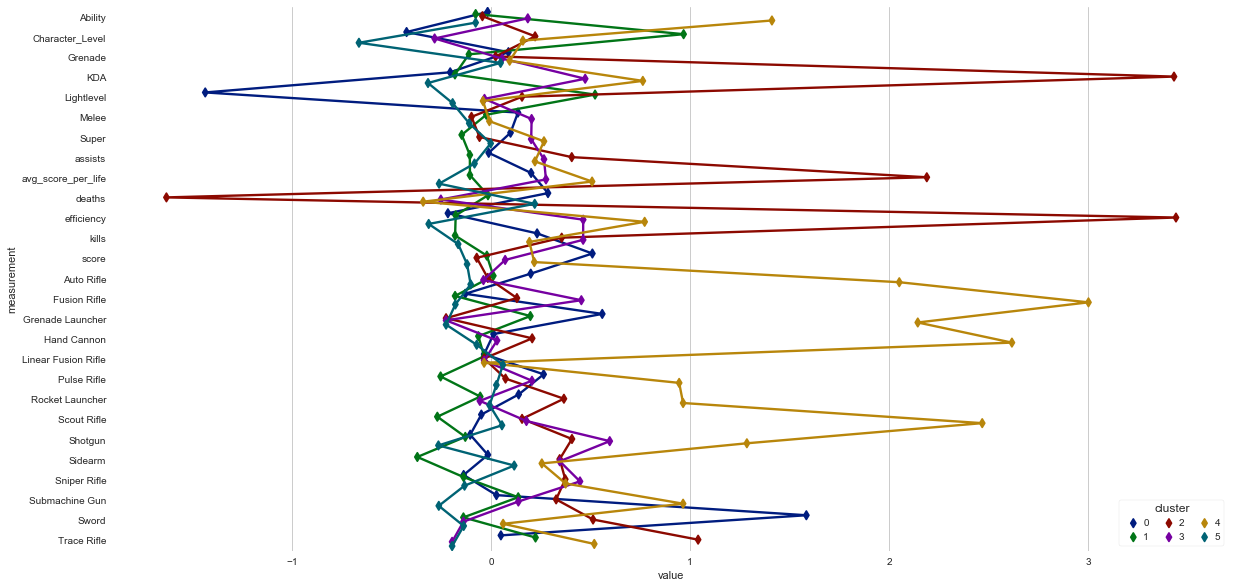

In [236]:
#Result Visualization 1
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(player_feature_df, 'cluster')

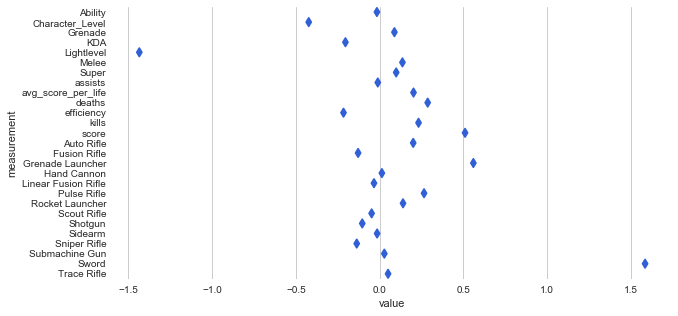

In [237]:
#Result Visualization 2
plt.rcParams["figure.figsize"] = (10,5)
plot_single_cluster(player_feature_df, 'cluster', 0)

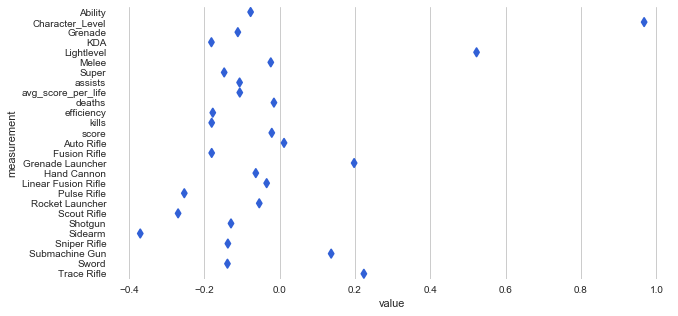

In [238]:
plot_single_cluster(player_feature_df, 'cluster', 1)

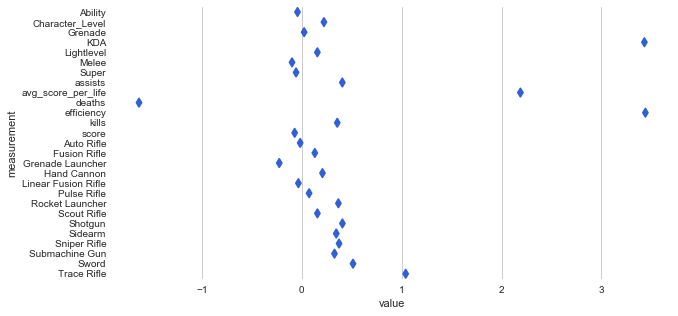

In [239]:
plot_single_cluster(player_feature_df, 'cluster', 2)

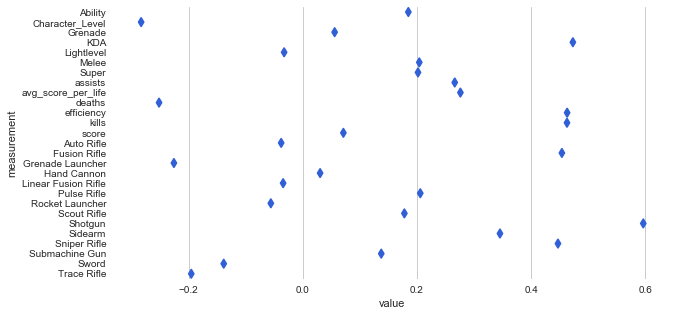

In [240]:
plot_single_cluster(player_feature_df, 'cluster', 3)

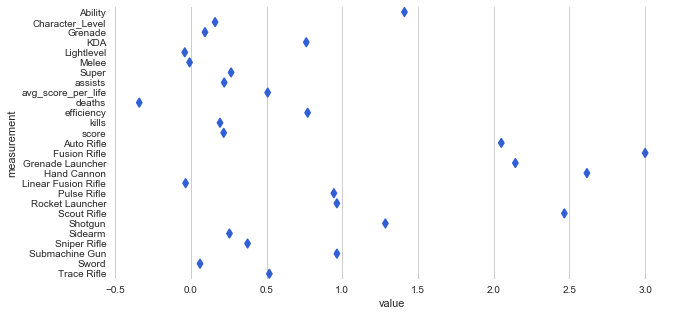

In [241]:
plot_single_cluster(player_feature_df, 'cluster', 4)

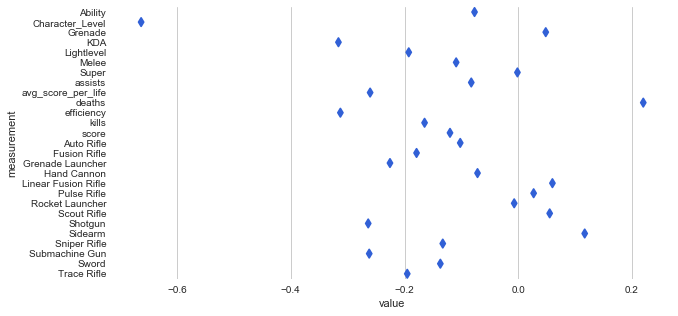

In [242]:
plot_single_cluster(player_feature_df, 'cluster', 5)

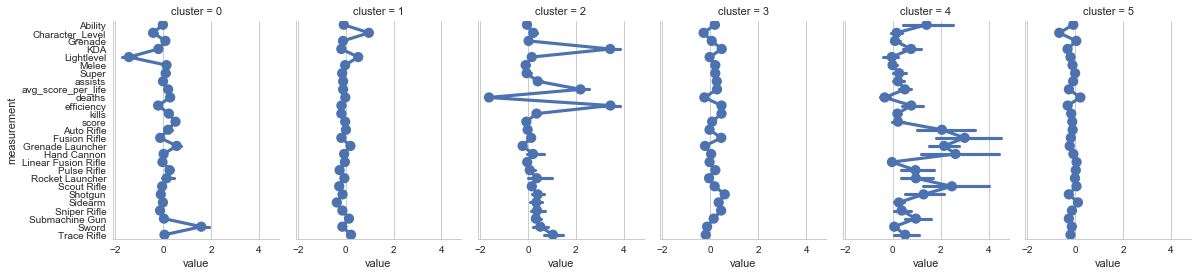

In [243]:
#Result Visualization 3
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_facet(player_feature_df, 'cluster')

In [244]:
plt.rcParams["figure.figsize"] = (10,5)